In [1]:
import sys
import json
import io
import numpy as np
import sklearn
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_json('train.json')
test_data = pd.read_json('test.json')

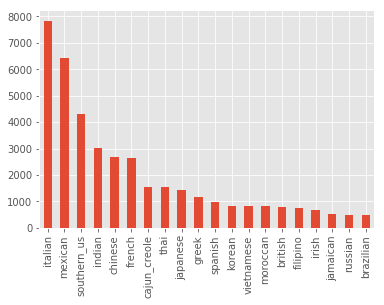

In [3]:
plt.style.use('ggplot')
train_data['cuisine'].value_counts().plot(kind='bar')

In [4]:
cv = CountVectorizer()
train_data['concat_ingredients'] = train_data['ingredients'].map(';'.join)
test_data['concat_ingredients'] = test_data['ingredients'].map(';'.join)
train_data.head()

,cuisine,id,ingredients,concat_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [5]:
## This Function helpfull for lower casing and stripping accents also
X = cv.fit_transform(train_data['concat_ingredients'].values)
X_test = cv.transform(test_data['concat_ingredients'].values)

In [6]:
id_test = test_data['id']
Y = train_data['cuisine']
Y.head()

0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object

In [7]:
## Naive Bayes Classifier
NaiveModel = MultinomialNB().fit(X,Y)

In [8]:
## Random Forest CLassifier
Model1 = RandomForestClassifier(max_depth=40, n_estimators=20).fit(X,Y)

In [10]:
## SGD Classifier
Model2 = SGDClassifier(loss='modified_huber', penalty='l2' , alpha=0.0001 , max_iter=10, tol=1e-3, random_state=65).fit(X,Y)

In [11]:
print("predicting")
Naive_PredictedY1s = NaiveModel.predict(X)
Random_PredictedY1s = Model1.predict(X)
SGD_PredictedY1s = Model2.predict(X)

predicting


In [12]:
print("Naive Bayes Accurracy : %f " % np.mean ( Naive_PredictedY1s == Y))
print("Random Forest Accurracy : %f " % np.mean ( Random_PredictedY1s == Y))
print("SGD classifier Accurracy : %f " % np.mean ( SGD_PredictedY1s == Y))

Naive Bayes Accurracy : 0.744632 
Random Forest Accurracy : 0.917785 
SGD classifier Accurracy : 0.794841 


In [13]:
print(classification_report(Naive_PredictedY1s, Y))

              precision    recall  f1-score   support

   brazilian       0.44      0.60      0.51       344
     british       0.49      0.37      0.42      1071
cajun_creole       0.76      0.59      0.66      2001
     chinese       0.87      0.76      0.81      3081
    filipino       0.52      0.75      0.61       527
      french       0.57      0.55      0.56      2745
       greek       0.70      0.69      0.69      1195
      indian       0.88      0.85      0.86      3102
       irish       0.45      0.65      0.54       465
     italian       0.78      0.85      0.81      7234
    jamaican       0.65      0.83      0.73       409
    japanese       0.63      0.89      0.74      1008
      korean       0.75      0.82      0.79       754
     mexican       0.88      0.92      0.90      6171
    moroccan       0.79      0.73      0.76       883
     russian       0.42      0.60      0.49       339
 southern_us       0.72      0.62      0.67      5086
     spanish       0.55    

In [14]:
print(classification_report(Random_PredictedY1s, Y))

              precision    recall  f1-score   support

   brazilian       0.80      1.00      0.89       375
     british       0.67      1.00      0.80       543
cajun_creole       0.93      1.00      0.96      1438
     chinese       0.96      0.96      0.96      2676
    filipino       0.80      0.99      0.89       612
      french       0.80      0.93      0.86      2283
       greek       0.84      0.99      0.91       998
      indian       0.96      0.98      0.97      2951
       irish       0.65      0.99      0.78       437
     italian       0.98      0.85      0.91      9051
    jamaican       0.85      1.00      0.92       448
    japanese       0.90      0.99      0.94      1299
      korean       0.92      0.99      0.96       771
     mexican       0.97      0.97      0.97      6463
    moroccan       0.88      1.00      0.94       728
     russian       0.64      1.00      0.78       314
 southern_us       0.96      0.76      0.85      5448
     spanish       0.70    

In [15]:
print(classification_report(SGD_PredictedY1s, Y))

              precision    recall  f1-score   support

   brazilian       0.62      0.80      0.70       361
     british       0.42      0.85      0.56       394
cajun_creole       0.53      0.92      0.67       893
     chinese       0.86      0.85      0.85      2709
    filipino       0.69      0.81      0.74       642
      french       0.47      0.74      0.57      1658
       greek       0.71      0.85      0.78       987
      indian       0.90      0.87      0.88      3097
       irish       0.66      0.67      0.66       659
     italian       0.95      0.70      0.81     10608
    jamaican       0.78      0.92      0.84       443
    japanese       0.77      0.82      0.79      1337
      korean       0.78      0.93      0.85       700
     mexican       0.94      0.89      0.92      6749
    moroccan       0.71      0.94      0.81       615
     russian       0.47      0.86      0.61       269
 southern_us       0.84      0.70      0.76      5159
     spanish       0.48    

In [16]:
## Predicting the test data
Predicted_Cuisines = Model1.predict(X_test)

In [17]:
## Output Predictions
out = io.open('submit.csv','w')
out.write(u'id , cuisine\n')
for i in range(9944):
    out.write('%s,%s\n' % (id_test[i], Predicted_Cuisines[i]))

In [18]:
## This section is to predict the user input ingredients

ing_array = ["baking powder;eggs;all-purpose flour;raisins;milk;white sugar"]
no_of_ingredients = input("Total Number Of Ingredients: ")
no_of_ingredients = int(no_of_ingredients)

ingredient = ""

for i in range(no_of_ingredients):
    ing = input("Enter Ingredient " + str(i) + " : ")
    ingredient = ingredient + ing + ";"

## Predicting User input ingredients

ing_array.append(ingredient)
User_in = cv.transform(ing_array)
Predicted = Model1.predict(User_in)
print("")
print("The predicted cuisine for input ingredients is : "+Predicted[1])

Total Number Of Ingredients: 21
Enter Ingredient 0 : ham
Enter Ingredient 1 : yellow onion
Enter Ingredient 2 : white rice
Enter Ingredient 3 : dried thyme
Enter Ingredient 4 : boneless chicken skinless thigh
Enter Ingredient 5 : flat leaf parsley
Enter Ingredient 6 : freshly ground pepper
Enter Ingredient 7 : all-purpose flour
Enter Ingredient 8 : vegetable oil
Enter Ingredient 9 : lump crab meat
Enter Ingredient 10 : browning
Enter Ingredient 11 : garlic cloves
Enter Ingredient 12 : hot sauce
Enter Ingredient 13 : paprika
Enter Ingredient 14 : water
Enter Ingredient 15 : andouille sausage
Enter Ingredient 16 : shrimp
Enter Ingredient 17 : okra
Enter Ingredient 18 : smoked sausage
Enter Ingredient 19 : file powder
Enter Ingredient 20 : meat cuts

The predicted cuisine for input ingredients is : cajun_creole
